In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error as mae
from fbprophet import Prophet
import itertools

import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.register_matplotlib_converters()

In [8]:
file = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/visits.csv'
df = pd.read_csv(file, index_col='published', parse_dates=['published'])

In [10]:
df.head()

,post_id
published,
2008-01-01 18:19:00,18284
2008-01-01 18:30:00,18285
2008-01-01 18:34:00,18286
2008-01-02 01:32:00,18291
2008-01-02 14:34:00,18294


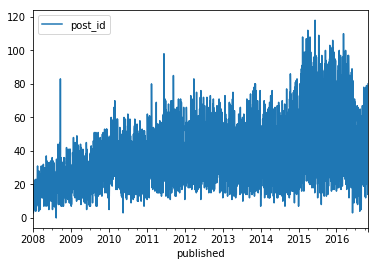

In [19]:
df.resample('1D').count().plot();

In [22]:
df_day = df.resample('1D').count().reset_index()
df_day.columns = ['ds', 'y']
df_day.head()

,ds,y
0,2008-01-01,3
1,2008-01-02,3
2,2008-01-03,4
3,2008-01-04,14
4,2008-01-05,4


In [34]:
num_points_to_pred = 30
train = df_day[:-num_points_to_pred]
test = df_day[-num_points_to_pred:]

In [38]:
m = Prophet()
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


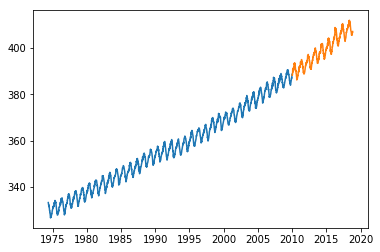

In [6]:
plt.plot(train.date, train.ppm_fixed)
plt.plot(test.date, test.ppm_fixed)

# Prophet

In [7]:
fb_df = train[['date', 'ppm_fixed']].copy()
fb_df.columns = ['ds', 'y']
fb_df.head()

,ds,y
0,1974-05-19,333.34
1,1974-05-26,332.95
2,1974-06-02,332.32
3,1974-06-09,332.18
4,1974-06-16,332.37


In [39]:
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
future = m.make_future_dataframe(periods=num_points_to_pred, freq='D', include_history=True)
future.head()

,ds
0,2008-01-01
1,2008-01-02
2,2008-01-03
3,2008-01-04
4,2008-01-05


In [62]:
forecast = m.predict(future)

In [63]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-01,16.967072,4.143324,32.161219,16.967072,16.967072,1.557044,1.557044,1.557044,11.745550,11.745550,11.745550,-10.188506,-10.188506,-10.188506,0.0,0.0,0.0,18.524116
1,2008-01-02,16.990142,2.170243,31.119084,16.990142,16.990142,-0.624209,-0.624209,-0.624209,9.760738,9.760738,9.760738,-10.384947,-10.384947,-10.384947,0.0,0.0,0.0,16.365934
2,2008-01-03,17.013212,-0.506711,29.371276,17.013212,17.013212,-2.002870,-2.002870,-2.002870,8.473932,8.473932,8.473932,-10.476802,-10.476802,-10.476802,0.0,0.0,0.0,15.010342
3,2008-01-04,17.036283,-3.499456,26.110660,17.036283,17.036283,-5.808726,-5.808726,-5.808726,4.653017,4.653017,4.653017,-10.461743,-10.461743,-10.461743,0.0,0.0,0.0,11.227557
4,2008-01-05,17.059353,-30.855742,-3.012487,17.059353,17.059353,-33.669013,-33.669013,-33.669013,-23.329926,-23.329926,-23.329926,-10.339086,-10.339086,-10.339086,0.0,0.0,0.0,-16.609659


In [65]:
def plot_forecast(test, forecast):
    forecast = forecast[-num_points_to_pred:]
    score = mae(test.y, forecast.yhat)
    plt.figure(figsize=(10, 6))
    plt.title(f'Forecast last {num_points_to_pred} points by Prophet\nscore {score:.3f}')
    # plt.plot(train.date, train.ppm_fixed, label='train')
    plt.plot(test.ds, test.y, 'o-', label='truth')
    plt.plot(test.ds, forecast.yhat, 'x-', label='predict')
    plt.legend();

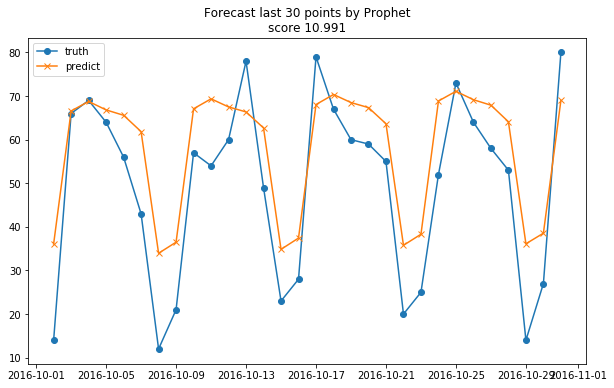

In [66]:
plot_forecast(test, forecast)

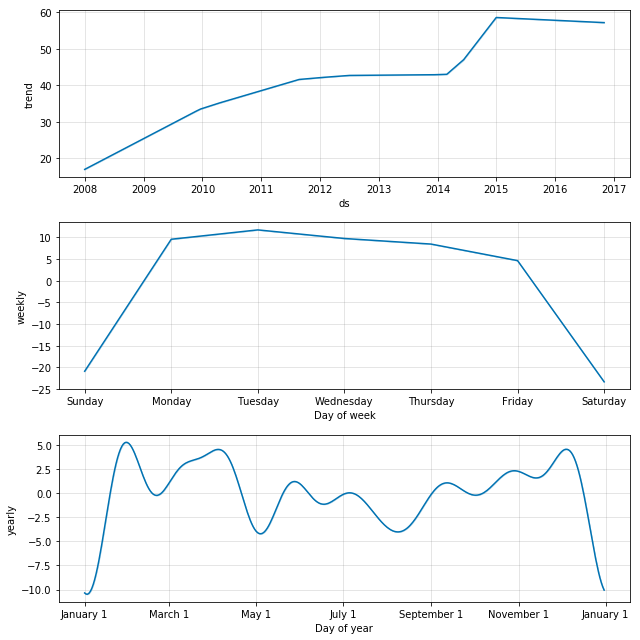

In [67]:
m.plot_components(forecast);